<div style="display: flex; align-items: center; justify-content: space-between; border-bottom: 3px solid #D0D0D0; padding: 10px; font-family: Arial, sans-serif;">
  <!-- Logo -->
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/1c/Uoc_masterbrand_vertical.png" alt="Logo" style="width: 150px; height: auto;">

  <!-- Detalles -->
  <div style="text-align: right; line-height: 1.6; margin-left: 20px; margin-right: 80px">
    <p style="margin: 0; font-size: 1.2em; font-weight: bold; color: #333;">Proyecto: <span style="color: #878787;">Práctica - Parte 2</span></p>
    <p style="margin: 0; font-size: 1em; font-weight: bold; color: #333;">Notebook: <span style="color: #878787;">Visualizaciones de prueba de estres, ansiedad y sueño</span></p>
    <p style="color: #878787;">Juan Luis González Rodríguez - Visualización de datos</span></p>
  </div>
</div>

Se analiza como afecta el nivel de estrés y ansiedad a la calidad del sueño de los usuarios.

# 0. Librerías

In [71]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos

In [72]:
saliva_path = os.path.join('..', '0_data', 'clean_MMASH', 'saliva_clean.pkl')
df_saliva = pd.read_pickle(saliva_path)

questionnaire_path = os.path.join('..', '0_data', 'clean_MMASH', 'questionnaire.pkl')
df_questionnaire = pd.read_pickle(questionnaire_path)

sleep_path = os.path.join('..', '0_data', 'clean_MMASH', 'sleep_clean.pkl')
df_sleep = pd.read_pickle(sleep_path)

Se visualizan los 3 conjuntos de datos para tener una idea de su estructura y contenido.

In [73]:
df_saliva

,User,Cortisol_before_sleep,Cortisol_wake_up,Cortisol_diff,Melatonin_before_sleep,Melatonin_wake_up,Melatonin_diff
0,user_1,0.034137,0.077939,0.043802,1.738385e-08,6.747893e-09,-1.063595e-08
1,user_2,0.021186,0.261252,0.240065,1.676342e-08,2.853905e-08,1.177563e-08
2,user_3,0.012142,0.043799,0.031657,5.714439e-09,3.603324e-09,-2.111115e-09
3,user_4,0.023772,0.041724,0.017952,2.149747e-08,8.055610e-09,-1.344186e-08
4,user_5,0.022310,0.089516,0.067206,2.396239e-08,1.096777e-08,-1.299462e-08
5,user_6,0.015039,0.081888,0.066849,1.126009e-08,8.363179e-09,-2.896914e-09
6,user_7,0.020206,0.057075,0.036868,1.016154e-08,1.217397e-08,2.012434e-09
7,user_8,0.035106,0.086437,0.051331,3.334482e-09,3.820310e-09,4.858282e-10
8,user_9,0.025968,0.080560,0.054592,5.593342e-09,7.385992e-09,1.792650e-09
9,user_10,0.037046,0.019659,-0.017387,8.669611e-09,2.573795e-09,-6.095816e-09


Se agrupan los 2 registros del usuario 1

In [74]:
# Se construye un df con los niveles de hormonas del usuario y se une con la eficiencia del sueño (en % y en bin), el número de despertares, el WASO y el Sleep Fragmentation Index
df_sleep_1 = df_sleep[['User', 'Number of Awakenings', 'Wake After Sleep Onset (WASO)', 'Sleep Fragmentation Index', 'Total Minutes in Bed', 'Total Sleep Time (TST)', 'Efficiency', 'Efficiency_bin']]
print("Registros del usuario 1")
display(df_sleep_1[df_sleep_1['User'] == 'user_1'])

# Se combinan los 2 registros del usuario 1,
# Se suma Number of Awakenings, Wake After Sleep Onset (WASO), Total Minutes in Bed, Total Sleep Time (TST), de las otras columnas se toma el promedio o la moda
df_sleep_1 = df_sleep_1.groupby('User').agg({'Number of Awakenings': 'sum',
                                             'Wake After Sleep Onset (WASO)': 'sum',
                                             'Sleep Fragmentation Index': 'mean',
                                             'Total Minutes in Bed': 'sum',
                                             'Total Sleep Time (TST)': 'sum',
                                             'Efficiency': 'mean',
                                             'Efficiency_bin': lambda x: x.mode()[0]})

# Se corrige la columna Efficiency
df_sleep_1.loc['user_1', 'Efficiency'] = df_sleep_1.loc['user_1', 'Total Sleep Time (TST)'] * 100 / df_sleep_1.loc['user_1', 'Total Minutes in Bed']

print("df_sleep después de combinar los 2 registros del usuario 1")
display(df_sleep_1)

Registros del usuario 1


,User,Number of Awakenings,Wake After Sleep Onset (WASO),Sleep Fragmentation Index,Total Minutes in Bed,Total Sleep Time (TST),Efficiency,Efficiency_bin
0,user_1,9,21,19.091,165,144,87.27,Buena
1,user_1,9,17,8.920,213,196,92.02,Buena


df_sleep después de combinar los 2 registros del usuario 1


,Number of Awakenings,Wake After Sleep Onset (WASO),Sleep Fragmentation Index,Total Minutes in Bed,Total Sleep Time (TST),Efficiency,Efficiency_bin
User,,,,,,,
user_1,18,38,14.0055,378,340,89.94709,Buena
user_10,13,78,28.3610,329,247,75.08000,Mala
user_12,12,21,24.4510,364,343,94.23000,Buena
user_13,19,76,33.7460,323,247,76.47000,Mala
user_14,19,38,11.4080,412,374,90.78000,Buena
user_15,15,27,18.5610,264,236,89.39000,Buena
user_16,39,113,31.6130,456,339,74.34000,Mala
user_17,20,46,28.4230,352,306,86.93000,Buena
user_18,9,53,36.4800,358,302,84.36000,Mala


In [75]:
df_questionnaire

,User,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1
0,user_1,47.0,41.0,43.0,5.0,23.0,22.0,21.0,14.0,14.0,21.0,17.0,12.0,18.0,17.0,11.0,13.0,13.0,10.0,10.0
1,user_2,52.0,24.0,39.0,7.0,26.0,26.0,21.0,12.0,6.0,37.0,32.0,24.0,27.0,33.0,11.0,10.0,16.0,17.0,18.0
2,user_3,59.0,27.0,27.0,8.0,11.0,19.0,18.0,12.0,6.0,35.0,34.0,31.0,28.0,35.0,11.0,12.0,11.0,12.0,11.0
3,user_4,60.0,28.0,40.0,4.0,10.0,20.0,17.0,13.0,14.0,30.0,27.0,22.0,19.0,26.0,11.0,13.0,15.0,14.0,14.0
4,user_5,52.0,54.0,47.0,8.0,41.0,25.0,23.0,14.0,15.0,30.0,25.0,31.0,27.0,31.0,26.0,17.0,17.0,15.0,16.0
5,user_6,48.0,32.0,47.0,9.0,41.0,19.0,19.0,13.0,15.0,27.0,25.0,30.0,25.0,14.0,13.0,12.0,13.0,15.0,16.0
6,user_7,46.0,33.0,NaN,7.0,69.0,19.0,19.0,12.0,6.0,22.0,13.0,13.0,11.0,13.0,11.0,13.0,16.0,14.0,13.0
7,user_8,64.0,32.0,39.0,3.0,74.0,24.0,18.0,12.0,9.0,36.0,25.0,30.0,21.0,24.0,14.0,11.0,10.0,12.0,10.0
8,user_9,44.0,36.0,41.0,9.0,38.0,20.0,18.0,14.0,10.0,29.0,34.0,35.0,22.0,24.0,11.0,11.0,13.0,16.0,15.0
9,user_10,38.0,39.0,46.0,4.0,14.0,19.0,16.0,16.0,14.0,28.0,23.0,21.0,18.0,23.0,15.0,23.0,23.0,27.0,12.0


In [76]:
df_sleep

,User,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index,In Bed DateTime,Out Bed DateTime,Efficiency_bin
0,user_1,2,00:46,2,03:31,2,00:46,0,87.27,165,144,21,9,2.33,9.091,10.000,19.091,1900-01-02 00:46:00,1900-01-02 03:31:00,Buena
1,user_1,2,03:57,2,07:30,2,03:57,0,92.02,213,196,17,9,1.89,8.920,0.000,8.920,1900-01-02 03:57:00,1900-01-02 07:30:00,Buena
2,user_2,2,00:50,2,06:22,2,00:54,4,73.49,332,244,84,18,4.67,15.060,5.556,20.616,1900-01-02 00:50:00,1900-01-02 06:22:00,Mala
3,user_3,1,22:29,2,05:52,1,22:32,3,79.23,443,351,89,16,5.56,18.962,0.000,18.962,1900-01-01 22:29:00,1900-01-02 05:52:00,Mala
4,user_4,2,00:57,2,07:10,2,01:01,4,85.52,373,319,50,28,1.79,8.847,14.286,23.133,1900-01-02 00:57:00,1900-01-02 07:10:00,Buena
5,user_5,1,23:56,2,06:42,1,23:56,0,85.71,406,348,58,21,2.76,11.576,9.524,21.100,1900-01-01 23:56:00,1900-01-02 06:42:00,Buena
6,user_6,2,02:27,2,09:02,2,02:27,0,84.30,395,333,62,20,3.10,10.633,4.762,15.395,1900-01-02 02:27:00,1900-01-02 09:02:00,Mala
7,user_7,2,00:28,2,08:02,2,00:28,0,75.33,454,342,112,31,3.61,17.401,28.125,45.526,1900-01-02 00:28:00,1900-01-02 08:02:00,Mala
8,user_8,2,00:17,2,07:13,2,00:20,3,80.77,416,336,77,27,2.85,17.308,25.926,43.234,1900-01-02 00:17:00,1900-01-02 07:13:00,Mala
9,user_9,2,00:30,2,11:00,2,00:33,3,91.75,630,578,49,4,12.25,8.095,0.000,8.095,1900-01-02 00:30:00,1900-01-02 11:00:00,Buena


# 2. Exploración de las visualizaciones

Se analiza como afectan los niveles de hormonas antes de dormir en el sueño

In [77]:
# Se construye un df con los niveles de hormonas del usuario y se une con la información del sueño
df_saliva_sleep = df_saliva.merge(df_sleep_1, on='User', how='inner')
df_saliva_sleep

,User,Cortisol_before_sleep,Cortisol_wake_up,Cortisol_diff,Melatonin_before_sleep,Melatonin_wake_up,Melatonin_diff,Number of Awakenings,Wake After Sleep Onset (WASO),Sleep Fragmentation Index,Total Minutes in Bed,Total Sleep Time (TST),Efficiency,Efficiency_bin
0,user_1,0.034137,0.077939,0.043802,1.738385e-08,6.747893e-09,-1.063595e-08,18,38,14.0055,378,340,89.94709,Buena
1,user_2,0.021186,0.261252,0.240065,1.676342e-08,2.853905e-08,1.177563e-08,18,84,20.6160,332,244,73.49000,Mala
2,user_3,0.012142,0.043799,0.031657,5.714439e-09,3.603324e-09,-2.111115e-09,16,89,18.9620,443,351,79.23000,Mala
3,user_4,0.023772,0.041724,0.017952,2.149747e-08,8.055610e-09,-1.344186e-08,28,50,23.1330,373,319,85.52000,Buena
4,user_5,0.022310,0.089516,0.067206,2.396239e-08,1.096777e-08,-1.299462e-08,21,58,21.1000,406,348,85.71000,Buena
5,user_6,0.015039,0.081888,0.066849,1.126009e-08,8.363179e-09,-2.896914e-09,20,62,15.3950,395,333,84.30000,Mala
6,user_7,0.020206,0.057075,0.036868,1.016154e-08,1.217397e-08,2.012434e-09,31,112,45.5260,454,342,75.33000,Mala
7,user_8,0.035106,0.086437,0.051331,3.334482e-09,3.820310e-09,4.858282e-10,27,77,43.2340,416,336,80.77000,Mala
8,user_9,0.025968,0.080560,0.054592,5.593342e-09,7.385992e-09,1.792650e-09,4,49,8.0950,630,578,91.75000,Buena
9,user_10,0.037046,0.019659,-0.017387,8.669611e-09,2.573795e-09,-6.095816e-09,13,78,28.3610,329,247,75.08000,Mala


**Hormonas vs sleep efficiency**

Analizamos los niveles de hormonas respecto a la eficiencia del sueño en términos de porcentaje

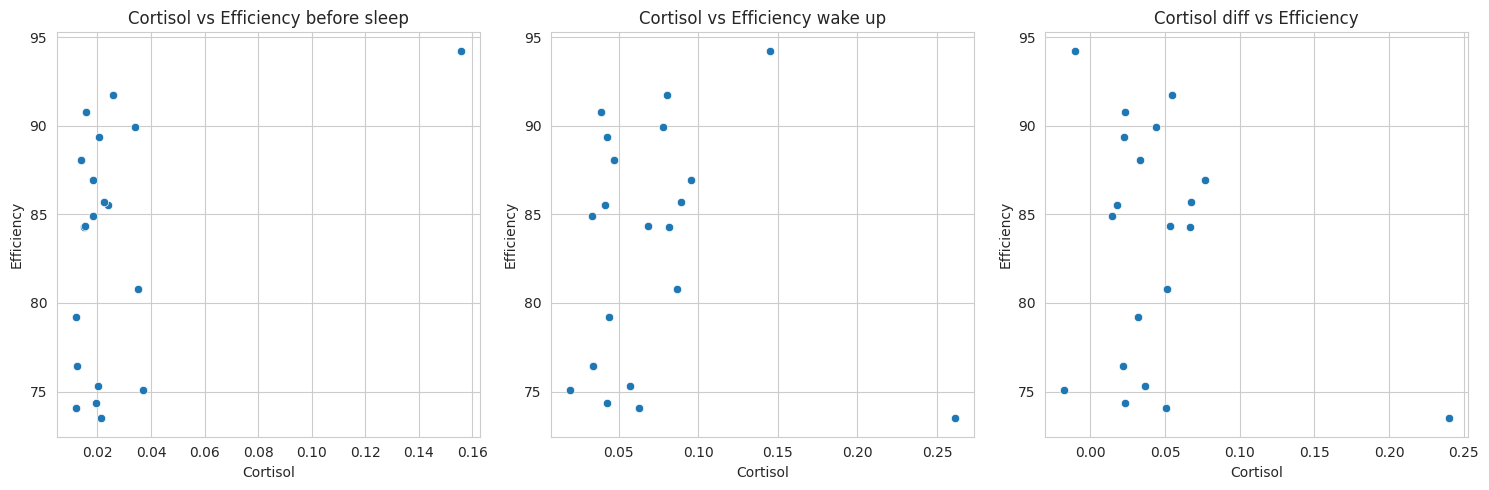

In [78]:
# 3 scatter plot del cortisol vs la eficiencia del sueño (%)
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df_saliva_sleep, x='Cortisol_before_sleep', y='Efficiency', ax=ax[0])
ax[0].set_title('Cortisol vs Efficiency before sleep')
ax[0].set_xlabel('Cortisol')
ax[0].set_ylabel('Efficiency')

sns.scatterplot(data=df_saliva_sleep, x='Cortisol_wake_up', y='Efficiency', ax=ax[1])
ax[1].set_title('Cortisol vs Efficiency wake up')
ax[1].set_xlabel('Cortisol')
ax[1].set_ylabel('Efficiency')

sns.scatterplot(data=df_saliva_sleep, x='Cortisol_diff', y='Efficiency', ax=ax[2])
ax[2].set_title('Cortisol diff vs Efficiency')
ax[2].set_xlabel('Cortisol')
ax[2].set_ylabel('Efficiency')

plt.tight_layout()
plt.show()

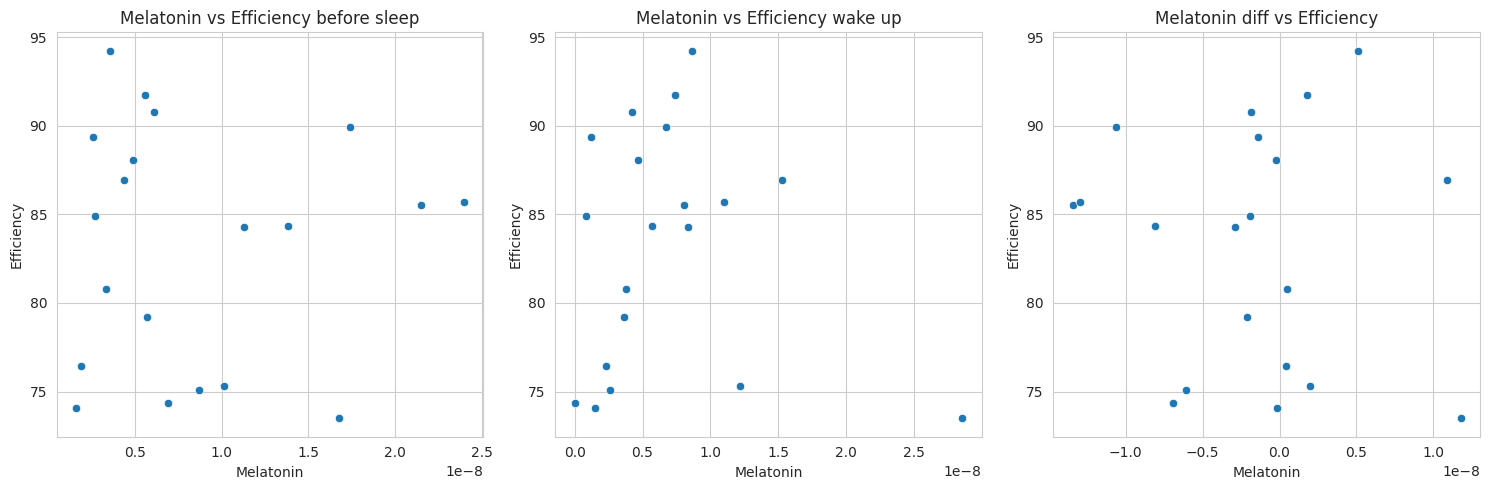

In [79]:
# 3 scatter plot de la melatonina vs la eficiencia del sueño (%)
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df_saliva_sleep, x='Melatonin_before_sleep', y='Efficiency', ax=ax[0])
ax[0].set_title('Melatonin vs Efficiency before sleep')
ax[0].set_xlabel('Melatonin')
ax[0].set_ylabel('Efficiency')

sns.scatterplot(data=df_saliva_sleep, x='Melatonin_wake_up', y='Efficiency', ax=ax[1])
ax[1].set_title('Melatonin vs Efficiency wake up')
ax[1].set_xlabel('Melatonin')
ax[1].set_ylabel('Efficiency')

sns.scatterplot(data=df_saliva_sleep, x='Melatonin_diff', y='Efficiency', ax=ax[2])
ax[2].set_title('Melatonin diff vs Efficiency')
ax[2].set_xlabel('Melatonin')
ax[2].set_ylabel('Efficiency')

plt.tight_layout()
plt.show()

Analizamos cómo afectan los niveles hormonales a la eficiencia del sueño en términos de categoría dicotómica

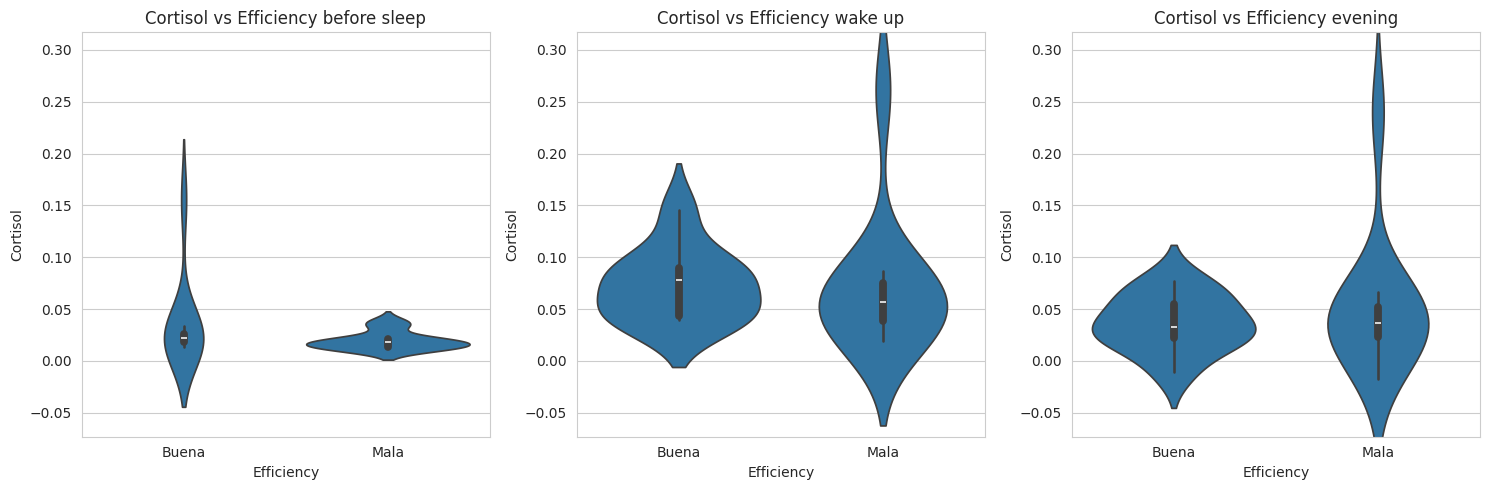

In [80]:
# Se hace un violin plot comparando los niveles de cortisol vs eficiencia del sueño bin
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Definir los límites del eje y con un margen adicional
y_min = df_saliva_sleep[['Cortisol_before_sleep', 'Cortisol_wake_up', 'Cortisol_diff']].min().min()
y_max = df_saliva_sleep[['Cortisol_before_sleep', 'Cortisol_wake_up', 'Cortisol_diff']].max().max()
y_margin = (y_max - y_min) * 0.20  # 10% de margen
y_limits = (y_min - y_margin, y_max + y_margin)

sns.violinplot(data=df_saliva_sleep, x='Efficiency_bin', y='Cortisol_before_sleep', ax=ax[0])
ax[0].set_title('Cortisol vs Efficiency before sleep')
ax[0].set_xlabel('Efficiency')
ax[0].set_ylabel('Cortisol')
ax[0].set_ylim(y_limits)

sns.violinplot(data=df_saliva_sleep, x='Efficiency_bin', y='Cortisol_wake_up', ax=ax[1])
ax[1].set_title('Cortisol vs Efficiency wake up')
ax[1].set_xlabel('Efficiency')
ax[1].set_ylabel('Cortisol')
ax[1].set_ylim(y_limits)

sns.violinplot(data=df_saliva_sleep, x='Efficiency_bin', y='Cortisol_diff', ax=ax[2])
ax[2].set_title('Cortisol vs Efficiency evening')
ax[2].set_xlabel('Efficiency')
ax[2].set_ylabel('Cortisol')
ax[2].set_ylim(y_limits)

plt.tight_layout()
plt.show()


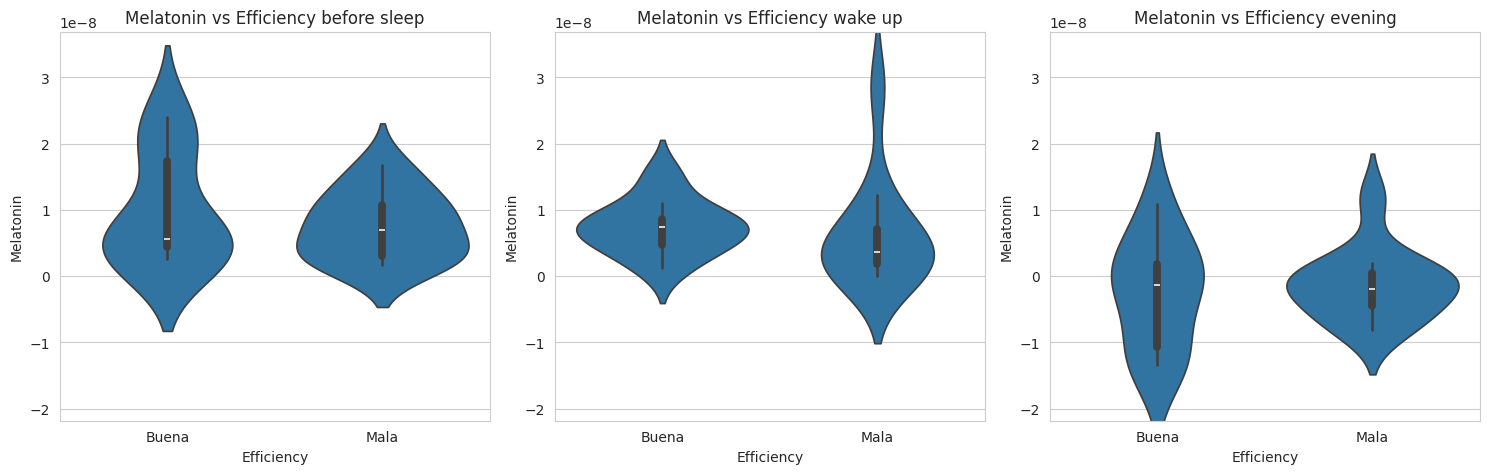

In [81]:
# Se hace un violin plot comparando los niveles de melatonina vs eficiencia del sueño bin
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Definir los límites del eje y con un margen adicional
y_min = df_saliva_sleep[['Melatonin_before_sleep', 'Melatonin_wake_up', 'Melatonin_diff']].min().min()
y_max = df_saliva_sleep[['Melatonin_before_sleep', 'Melatonin_wake_up', 'Melatonin_diff']].max().max()
y_margin = (y_max - y_min) * 0.20  # 20% de margen
y_limits = (y_min - y_margin, y_max + y_margin)

sns.violinplot(data=df_saliva_sleep, x='Efficiency_bin', y='Melatonin_before_sleep', ax=ax[0])
ax[0].set_title('Melatonin vs Efficiency before sleep')
ax[0].set_xlabel('Efficiency')
ax[0].set_ylabel('Melatonin')
ax[0].set_ylim(y_limits)

sns.violinplot(data=df_saliva_sleep, x='Efficiency_bin', y='Melatonin_wake_up', ax=ax[1])
ax[1].set_title('Melatonin vs Efficiency wake up')
ax[1].set_xlabel('Efficiency')
ax[1].set_ylabel('Melatonin')
ax[1].set_ylim(y_limits)

sns.violinplot(data=df_saliva_sleep, x='Efficiency_bin', y='Melatonin_diff', ax=ax[2])
ax[2].set_title('Melatonin vs Efficiency evening')
ax[2].set_xlabel('Efficiency')
ax[2].set_ylabel('Melatonin')
ax[2].set_ylim(y_limits)

plt.tight_layout()
plt.show()

**WASO/Number of Awakenings/Sleep Fragmentation Index vs. Efficiency**

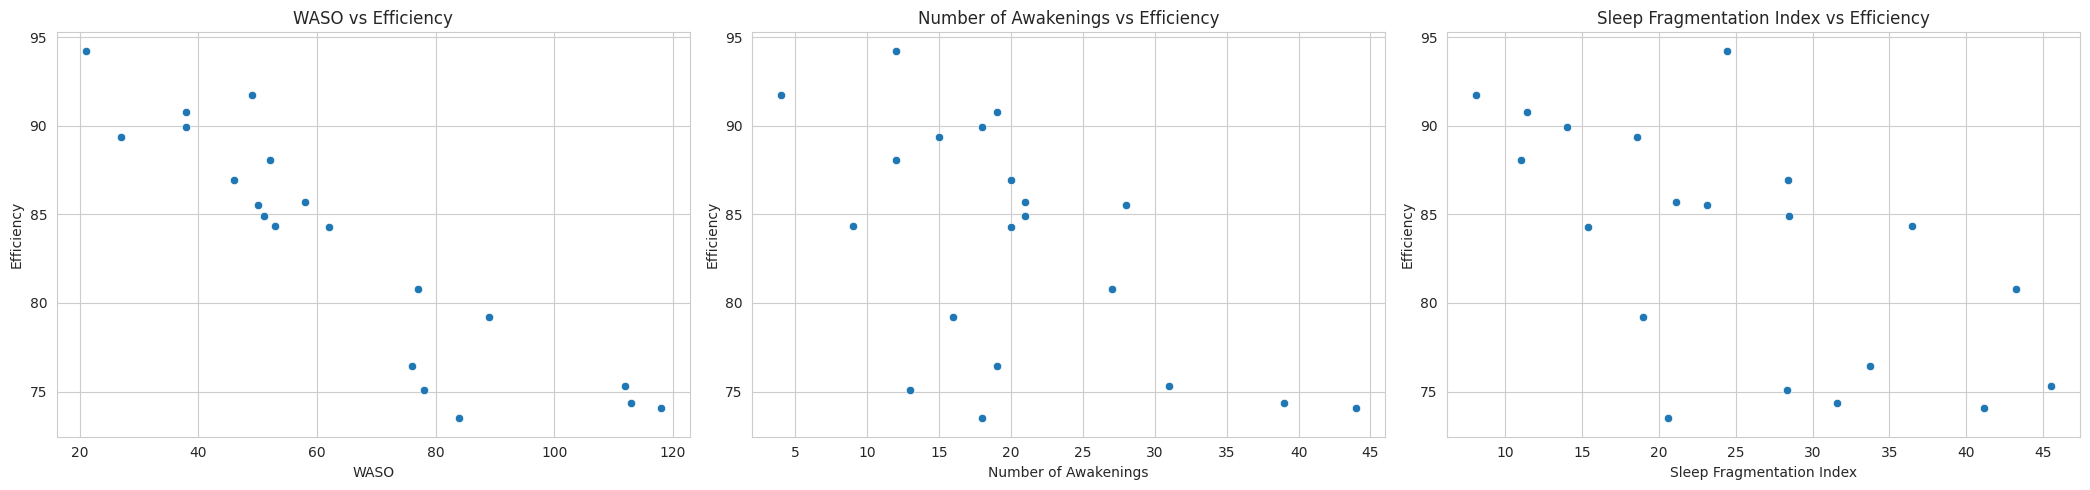

In [82]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(21, 5))

sns.scatterplot(data=df_saliva_sleep, x='Wake After Sleep Onset (WASO)', y='Efficiency', ax=ax[0])
ax[0].set_title('WASO vs Efficiency')
ax[0].set_xlabel('WASO')
ax[0].set_ylabel('Efficiency')

sns.scatterplot(data=df_saliva_sleep, x='Number of Awakenings', y='Efficiency', ax=ax[1])
ax[1].set_title('Number of Awakenings vs Efficiency')
ax[1].set_xlabel('Number of Awakenings')
ax[1].set_ylabel('Efficiency')

sns.scatterplot(data=df_saliva_sleep, x='Sleep Fragmentation Index', y='Efficiency', ax=ax[2])
ax[2].set_title('Sleep Fragmentation Index vs Efficiency')
ax[2].set_xlabel('Sleep Fragmentation Index')
ax[2].set_ylabel('Efficiency')

plt.tight_layout()
plt.show()


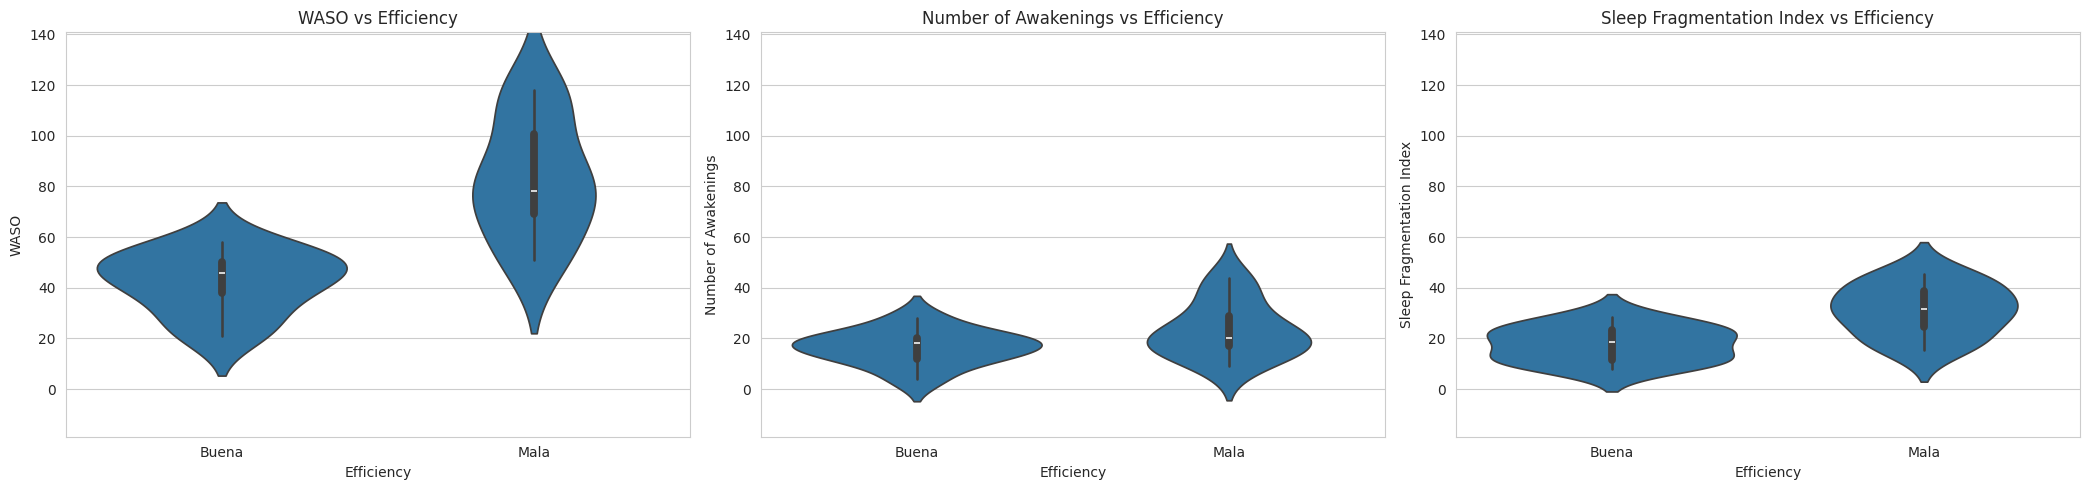

In [83]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(21, 5))

# Definir los límites del eje y con un margen adicional
y_min = df_saliva_sleep[['Wake After Sleep Onset (WASO)', 'Number of Awakenings', 'Sleep Fragmentation Index']].min().min()
y_max = df_saliva_sleep[['Wake After Sleep Onset (WASO)', 'Number of Awakenings', 'Sleep Fragmentation Index']].max().max()
y_margin = (y_max - y_min) * 0.20  # 20% de margen
y_limits = (y_min - y_margin, y_max + y_margin)

sns.violinplot(data=df_saliva_sleep, x='Efficiency_bin', y='Wake After Sleep Onset (WASO)', ax=ax[0])
ax[0].set_title('WASO vs Efficiency')
ax[0].set_xlabel('Efficiency')
ax[0].set_ylabel('WASO')
ax[0].set_ylim(y_limits)

sns.violinplot(data=df_saliva_sleep, x='Efficiency_bin', y='Number of Awakenings', ax=ax[1])
ax[1].set_title('Number of Awakenings vs Efficiency')
ax[1].set_xlabel('Efficiency')
ax[1].set_ylabel('Number of Awakenings')
ax[1].set_ylim(y_limits)

sns.violinplot(data=df_saliva_sleep, x='Efficiency_bin', y='Sleep Fragmentation Index', ax=ax[2])
ax[2].set_title('Sleep Fragmentation Index vs Efficiency')
ax[2].set_xlabel('Efficiency')
ax[2].set_ylabel('Sleep Fragmentation Index')
ax[2].set_ylim(y_limits)

plt.tight_layout()
plt.show()


**Anxiety/Stress vs Efficiency**

In [84]:
# Se crea un df con los datos del cuestionario relacionados con el estrés y la ansidad y se unen a los de eficiencia del sueño
df_questionnaire_1 = df_questionnaire[['User', 'STAI1', 'STAI2', 'Daily_stress']]
df_sleep_quest = df_sleep_1.merge(df_questionnaire_1, on='User', how='inner')
df_sleep_quest

,User,Number of Awakenings,Wake After Sleep Onset (WASO),Sleep Fragmentation Index,Total Minutes in Bed,Total Sleep Time (TST),Efficiency,Efficiency_bin,STAI1,STAI2,Daily_stress
0,user_1,18,38,14.0055,378,340,89.94709,Buena,41.0,43.0,23.0
1,user_10,13,78,28.3610,329,247,75.08000,Mala,39.0,46.0,14.0
2,user_12,12,21,24.4510,364,343,94.23000,Buena,27.0,33.0,48.0
3,user_13,19,76,33.7460,323,247,76.47000,Mala,30.0,43.0,27.0
4,user_14,19,38,11.4080,412,374,90.78000,Buena,48.0,45.0,26.0
5,user_15,15,27,18.5610,264,236,89.39000,Buena,52.0,42.0,35.0
6,user_16,39,113,31.6130,456,339,74.34000,Mala,29.0,41.0,32.0
7,user_17,20,46,28.4230,352,306,86.93000,Buena,34.0,49.0,20.0
8,user_18,9,53,36.4800,358,302,84.36000,Mala,33.0,44.0,32.0
9,user_19,44,118,41.1760,459,340,74.07000,Mala,26.0,35.0,31.0


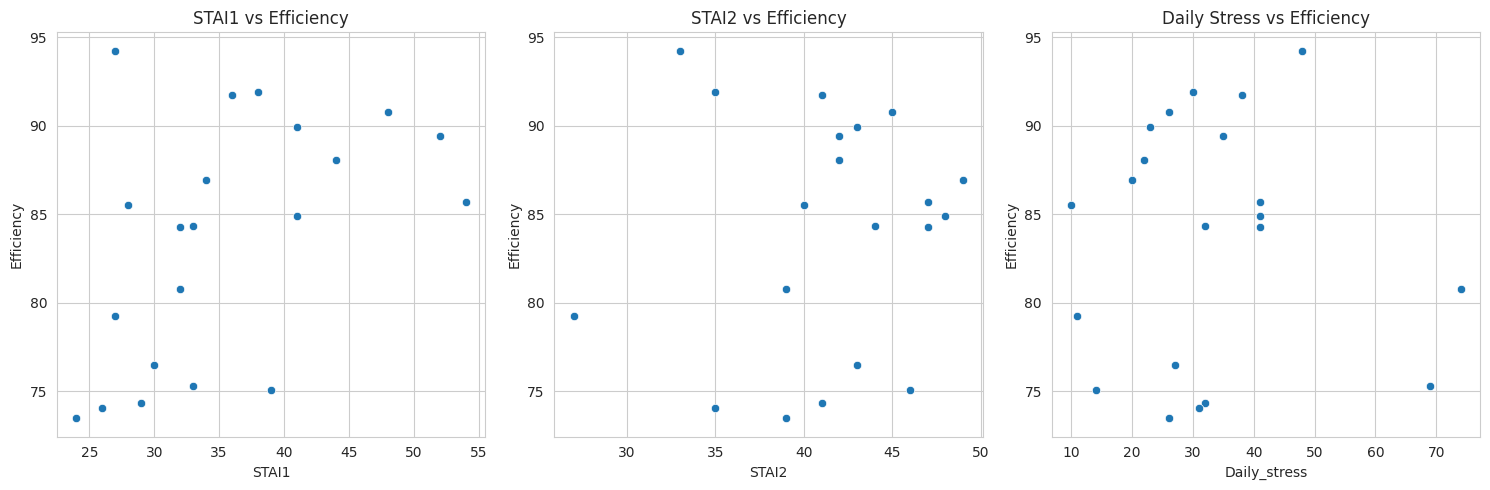

In [85]:
# STAI 1, 2 y Stress vs Efficiency(%)
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df_sleep_quest, x='STAI1', y='Efficiency', ax=ax[0])
ax[0].set_title('STAI1 vs Efficiency')

sns.scatterplot(data=df_sleep_quest, x='STAI2', y='Efficiency', ax=ax[1])
ax[1].set_title('STAI2 vs Efficiency')

sns.scatterplot(data=df_sleep_quest, x='Daily_stress', y='Efficiency', ax=ax[2])
ax[2].set_title('Daily Stress vs Efficiency')

plt.tight_layout()
plt.show()

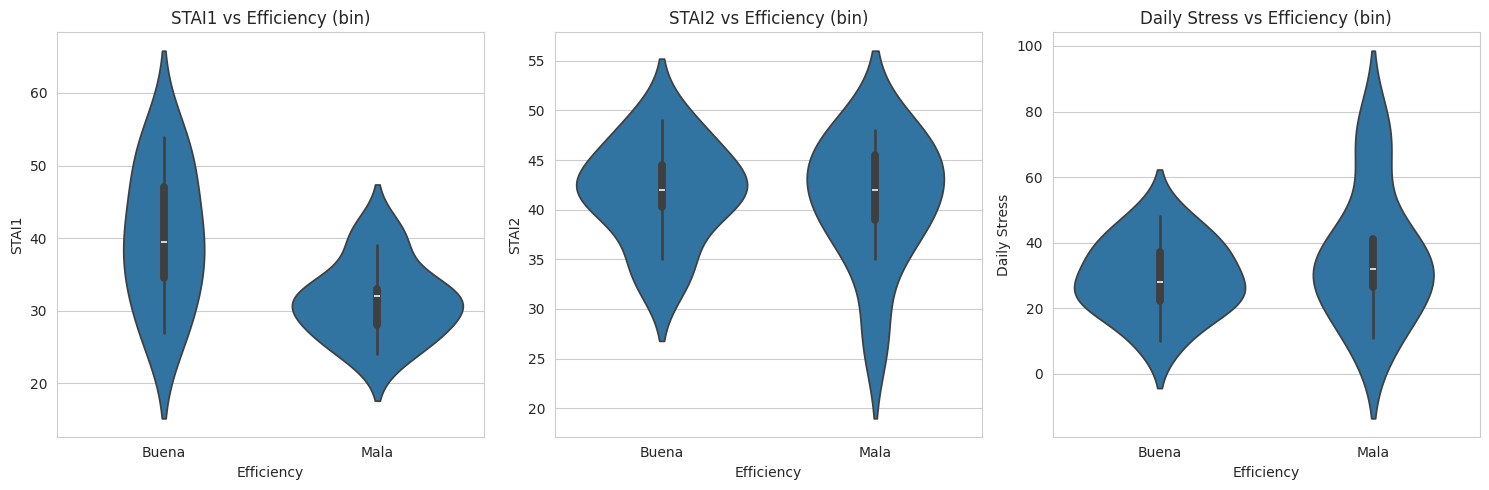

In [86]:
# STAI 1, 2 y Stress vs Efficiency (bin)
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(data=df_sleep_quest, x='Efficiency_bin', y='STAI1', ax=ax[0])
ax[0].set_title('STAI1 vs Efficiency (bin)')
ax[0].set_xlabel('Efficiency')
ax[0].set_ylabel('STAI1')

sns.violinplot(data=df_sleep_quest, x='Efficiency_bin', y='STAI2', ax=ax[1])
ax[1].set_title('STAI2 vs Efficiency (bin)')
ax[1].set_xlabel('Efficiency')
ax[1].set_ylabel('STAI2')

sns.violinplot(data=df_sleep_quest, x='Efficiency_bin', y='Daily_stress', ax=ax[2])
ax[2].set_title('Daily Stress vs Efficiency (bin)')
ax[2].set_xlabel('Efficiency')
ax[2].set_ylabel('Daily Stress')

plt.tight_layout()
plt.show()

**Anxiety/Stress vs SFI**

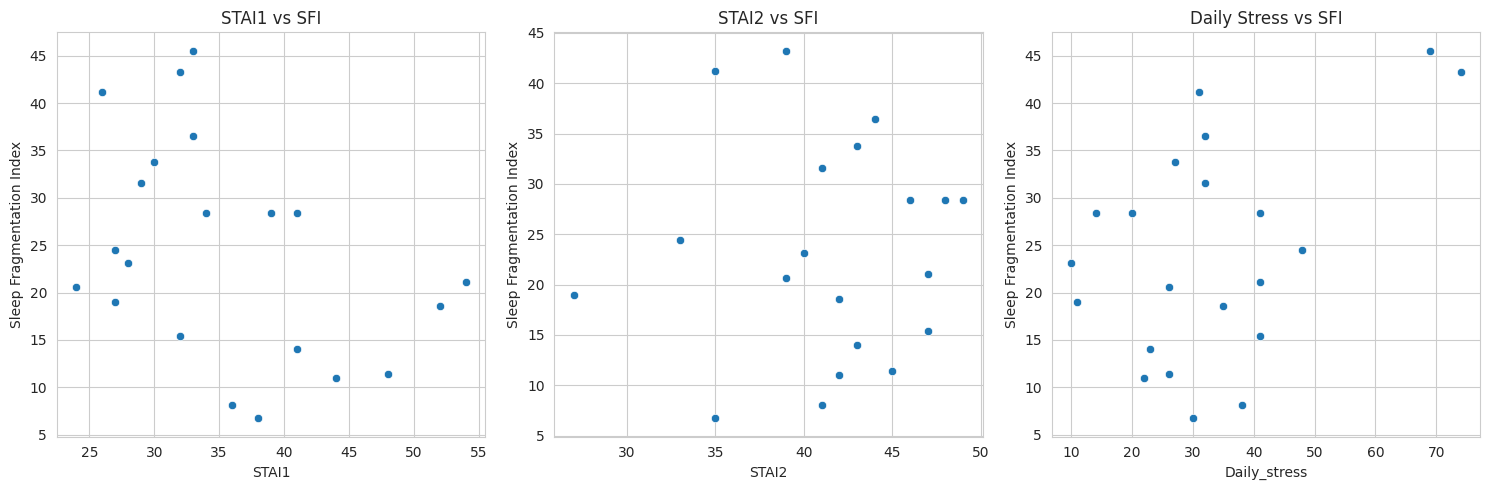

In [87]:
# Se crea un scatter plot de SFI vs STAI1, STAI2 y Daily Stress
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df_sleep_quest, x='STAI1', y='Sleep Fragmentation Index', ax=ax[0])
ax[0].set_title('STAI1 vs SFI')

sns.scatterplot(data=df_sleep_quest, x='STAI2', y='Sleep Fragmentation Index', ax=ax[1])
ax[1].set_title('STAI2 vs SFI')

sns.scatterplot(data=df_sleep_quest, x='Daily_stress', y='Sleep Fragmentation Index', ax=ax[2])
ax[2].set_title('Daily Stress vs SFI')

plt.tight_layout()
plt.show()

**Number of Awakenings vs SFI**

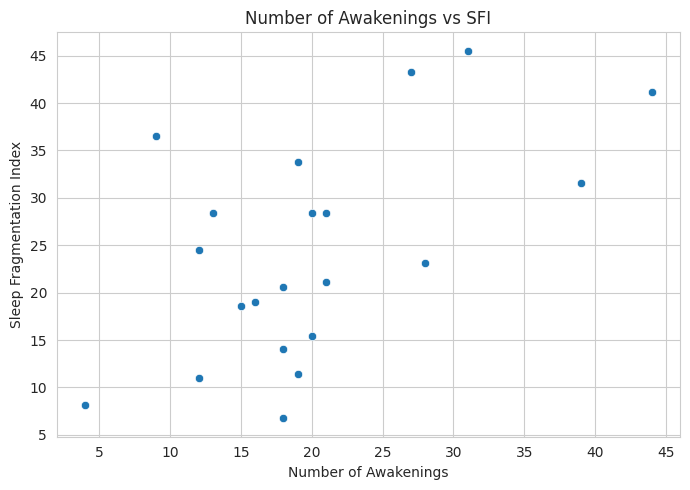

In [89]:
# Se crea un scatter plot de SFI vs Number of Awakenings
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

sns.scatterplot(data=df_sleep_quest, x='Number of Awakenings', y='Sleep Fragmentation Index', ax=ax)
ax.set_title('Number of Awakenings vs SFI')

plt.tight_layout()
plt.show()